# Providing insights from self-reported sexism data (using search term and LDA)

This notebook analyses a dataset of sexism stories entries that have a 'workplace' tag AND search term(s).
The timeline of the entries in the dataset ranged from Sep 2019 to Sep 2022.

Non pay-related data were analysed using LDA in https://github.com/ifeomaaaa/WiD-Datathon/blob/main/everyday-sexism-topic-modelling-LDA.ipynb
Non pay-related data were analysed using top2vec in https://github.com/ifeomaaaa/WiD-Datathon/blob/main/everyday-sexism-topic-modelling-top2vec.ipynb



In [207]:
# Imports for data reading and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read data and preprocess frame

In [208]:
df = pd.read_csv('../workplace_veryday_sexism_data_1_78.csv')  

Let's get an idea of the total entries and if there are any missing data.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   770 non-null    int64 
 1   post_id      770 non-null    object
 2   tags         770 non-null    object
 3   title        769 non-null    object
 4   date         770 non-null    object
 5   description  770 non-null    object
dtypes: int64(1), object(5)
memory usage: 36.2+ KB


Summary: The CSV file contained 770 entries of sexual harassment stories (from 21 Sep 2019 to 21 Sep 2022) that contained 'workplace' tag.

In [210]:
df.head()

,Unnamed: 0,post_id,tags,title,date,description
0,0,post-199274,"['university', 'workplace']",Kayte,21st September 2022,"Hello Laura, Thank you so much for creating a safe forum for women to share and unburden themselves. I was raped in the late 60’s in Canada by a US Marine. I had had many pleasant conversations with this man and I thought he was my friend. One evening he offered to give me a ride home from my student job, ostensibly to save me the taxi fare, held a military issue knife to my throat and raped me. I was terrified that cutting my throat was going to be part of his fantasy. Some time later I read that groups of US soldiers in Viet Nam would walk into people’s homes and drag young women from their family dinners out to a hut nearby and group rape them. After the rapes the soldiers would allow the woman to start running away and then shoot her, saying that they had shot a Viet Kong trying to escape. I realized after reading this that if I had not been in a western country where murder would have been messy to conceal, this man would probably have killed me as part of his carefully planned and ritualized practice. I did not report the incident. There was a great deal of victim blaming and vicious grilling in courtrooms at the time. I’m not sure it has changed very much. Now in my 70’s, I see that rape culture is still active and in professional roles women’s contributions, even when excellent, are still often minimized in relation to lesser contributions from men. I’m very pleased to see many more women in the sciences, some female leaders of countries and the first female Vice President in the US. Back in the 70’s I optimistically expected to see female equality in my lifetime. I realize now that we still have a long way to go. The invention of social media is a huge game changer. Thank you so much, again, for creating this site."
1,1,post-199279,"['cuerpo', 'workplace']",María,21st September 2022,"El director de la Biblioteca donde trabajo mencionaba algún comentario sobre mi cuerpo “demasiado delgado” o “ya más adecuado” cuando se topaba conmigo en la escalera, en el ascensor, en el pasillo. Nunca comentó mi trabajo, sin embargo mi cuerpo era motivo de su incumbencia. No puedo describir la ira que eso me hacía sentir"
2,2,post-199285,"['conferences', 'engineering', 'webinars', 'workplace']",A disappointed professional engineer,21st September 2022,"Since lockdowns began over a year ago, I have attended many online events. I work in engineering where there aren’t many women still. I am getting very fed up of manels when I know there are enough women out there to be asked to chair or present. I am one of them, and I’ve not been asked once. I have three decades of experience. It’s like we don’t exist at all."
3,3,post-199299,['workplace'],Joy,21st September 2022,"I work in a library and seeing what passes for Junior fiction that these parents let their children read is very irritating and wish they learned to broaden their minds a bit. I grew up being told I could read anything I wanted without putting it into little boxes marked “Male” and “Female”. Boys fiction seems to be about Action, Adventure and Weaponry. Girls fiction seems to be highly look-centred (For what? I often ask myself. To groom them for a future role as a shopping mall consumer?), being pretty or (in a lot of cases) a princess."
4,4,post-199308,['workplace'],Lori,21st September 2022,"Nothing quite like the review of being “hard to work with,” without bringing any situations or examples to back up the comment. This was from a supervisor who refuses to let me do my job and insists on micro managing me and taking over my projects. Just let me do my job. Hold the sexism."


Looks like there may be some non-English text. After a manual inspection, only entry 1 is non-English text. We shall drop that entry. 

In [211]:
df = df.drop(1, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,post_id,tags,title,date,description
0,0,post-199274,"['university', 'workplace']",Kayte,21st September 2022,"Hello Laura, Thank you so much for creating a safe forum for women to share and unburden themselves. I was raped in the late 60’s in Canada by a US Marine. I had had many pleasant conversations with this man and I thought he was my friend. One evening he offered to give me a ride home from my student job, ostensibly to save me the taxi fare, held a military issue knife to my throat and raped me. I was terrified that cutting my throat was going to be part of his fantasy. Some time later I read that groups of US soldiers in Viet Nam would walk into people’s homes and drag young women from their family dinners out to a hut nearby and group rape them. After the rapes the soldiers would allow the woman to start running away and then shoot her, saying that they had shot a Viet Kong trying to escape. I realized after reading this that if I had not been in a western country where murder would have been messy to conceal, this man would probably have killed me as part of his carefully planned and ritualized practice. I did not report the incident. There was a great deal of victim blaming and vicious grilling in courtrooms at the time. I’m not sure it has changed very much. Now in my 70’s, I see that rape culture is still active and in professional roles women’s contributions, even when excellent, are still often minimized in relation to lesser contributions from men. I’m very pleased to see many more women in the sciences, some female leaders of countries and the first female Vice President in the US. Back in the 70’s I optimistically expected to see female equality in my lifetime. I realize now that we still have a long way to go. The invention of social media is a huge game changer. Thank you so much, again, for creating this site."
1,2,post-199285,"['conferences', 'engineering', 'webinars', 'workplace']",A disappointed professional engineer,21st September 2022,"Since lockdowns began over a year ago, I have attended many online events. I work in engineering where there aren’t many women still. I am getting very fed up of manels when I know there are enough women out there to be asked to chair or present. I am one of them, and I’ve not been asked once. I have three decades of experience. It’s like we don’t exist at all."
2,3,post-199299,['workplace'],Joy,21st September 2022,"I work in a library and seeing what passes for Junior fiction that these parents let their children read is very irritating and wish they learned to broaden their minds a bit. I grew up being told I could read anything I wanted without putting it into little boxes marked “Male” and “Female”. Boys fiction seems to be about Action, Adventure and Weaponry. Girls fiction seems to be highly look-centred (For what? I often ask myself. To groom them for a future role as a shopping mall consumer?), being pretty or (in a lot of cases) a princess."
3,4,post-199308,['workplace'],Lori,21st September 2022,"Nothing quite like the review of being “hard to work with,” without bringing any situations or examples to back up the comment. This was from a supervisor who refuses to let me do my job and insists on micro managing me and taking over my projects. Just let me do my job. Hold the sexism."
4,5,post-199309,['workplace'],Liza,21st September 2022,I’m a finance manager – oversee millions of dollars on infrastructure works. Meeting on site to view construction works – as I arrived – both male engineers walked ahead in site – saw me arriving but decided to exclude me and I had to ‘catch up’ like a child. I was very tempted not to approved the budget! Infuriating though.


Let's drop the title, as this matched the entry field for person's name in the submission form.

In [212]:
# drop the title row as this matched the entries' person name in the submission query
df = df.drop('title', axis=1)
df.head()

,Unnamed: 0,post_id,tags,date,description
0,0,post-199274,"['university', 'workplace']",21st September 2022,"Hello Laura, Thank you so much for creating a safe forum for women to share and unburden themselves. I was raped in the late 60’s in Canada by a US Marine. I had had many pleasant conversations with this man and I thought he was my friend. One evening he offered to give me a ride home from my student job, ostensibly to save me the taxi fare, held a military issue knife to my throat and raped me. I was terrified that cutting my throat was going to be part of his fantasy. Some time later I read that groups of US soldiers in Viet Nam would walk into people’s homes and drag young women from their family dinners out to a hut nearby and group rape them. After the rapes the soldiers would allow the woman to start running away and then shoot her, saying that they had shot a Viet Kong trying to escape. I realized after reading this that if I had not been in a western country where murder would have been messy to conceal, this man would probably have killed me as part of his carefully planned and ritualized practice. I did not report the incident. There was a great deal of victim blaming and vicious grilling in courtrooms at the time. I’m not sure it has changed very much. Now in my 70’s, I see that rape culture is still active and in professional roles women’s contributions, even when excellent, are still often minimized in relation to lesser contributions from men. I’m very pleased to see many more women in the sciences, some female leaders of countries and the first female Vice President in the US. Back in the 70’s I optimistically expected to see female equality in my lifetime. I realize now that we still have a long way to go. The invention of social media is a huge game changer. Thank you so much, again, for creating this site."
1,2,post-199285,"['conferences', 'engineering', 'webinars', 'workplace']",21st September 2022,"Since lockdowns began over a year ago, I have attended many online events. I work in engineering where there aren’t many women still. I am getting very fed up of manels when I know there are enough women out there to be asked to chair or present. I am one of them, and I’ve not been asked once. I have three decades of experience. It’s like we don’t exist at all."
2,3,post-199299,['workplace'],21st September 2022,"I work in a library and seeing what passes for Junior fiction that these parents let their children read is very irritating and wish they learned to broaden their minds a bit. I grew up being told I could read anything I wanted without putting it into little boxes marked “Male” and “Female”. Boys fiction seems to be about Action, Adventure and Weaponry. Girls fiction seems to be highly look-centred (For what? I often ask myself. To groom them for a future role as a shopping mall consumer?), being pretty or (in a lot of cases) a princess."
3,4,post-199308,['workplace'],21st September 2022,"Nothing quite like the review of being “hard to work with,” without bringing any situations or examples to back up the comment. This was from a supervisor who refuses to let me do my job and insists on micro managing me and taking over my projects. Just let me do my job. Hold the sexism."
4,5,post-199309,['workplace'],21st September 2022,I’m a finance manager – oversee millions of dollars on infrastructure works. Meeting on site to view construction works – as I arrived – both male engineers walked ahead in site – saw me arriving but decided to exclude me and I had to ‘catch up’ like a child. I was very tempted not to approved the budget! Infuriating though.


In [213]:
# convert date stamp to month and year
df['DATETIME'] = pd.to_datetime(df['date'])
df['month'] = df['DATETIME'].dt.month
df['year'] = df['DATETIME'].dt.year
df.tail()

df.drop(['date','Unnamed: 0'], axis=1, inplace=True)
df.head()

,post_id,tags,description,DATETIME,month,year
0,post-199274,"['university', 'workplace']","Hello Laura, Thank you so much for creating a safe forum for women to share and unburden themselves. I was raped in the late 60’s in Canada by a US Marine. I had had many pleasant conversations with this man and I thought he was my friend. One evening he offered to give me a ride home from my student job, ostensibly to save me the taxi fare, held a military issue knife to my throat and raped me. I was terrified that cutting my throat was going to be part of his fantasy. Some time later I read that groups of US soldiers in Viet Nam would walk into people’s homes and drag young women from their family dinners out to a hut nearby and group rape them. After the rapes the soldiers would allow the woman to start running away and then shoot her, saying that they had shot a Viet Kong trying to escape. I realized after reading this that if I had not been in a western country where murder would have been messy to conceal, this man would probably have killed me as part of his carefully planned and ritualized practice. I did not report the incident. There was a great deal of victim blaming and vicious grilling in courtrooms at the time. I’m not sure it has changed very much. Now in my 70’s, I see that rape culture is still active and in professional roles women’s contributions, even when excellent, are still often minimized in relation to lesser contributions from men. I’m very pleased to see many more women in the sciences, some female leaders of countries and the first female Vice President in the US. Back in the 70’s I optimistically expected to see female equality in my lifetime. I realize now that we still have a long way to go. The invention of social media is a huge game changer. Thank you so much, again, for creating this site.",2022-09-21,9,2022
1,post-199285,"['conferences', 'engineering', 'webinars', 'workplace']","Since lockdowns began over a year ago, I have attended many online events. I work in engineering where there aren’t many women still. I am getting very fed up of manels when I know there are enough women out there to be asked to chair or present. I am one of them, and I’ve not been asked once. I have three decades of experience. It’s like we don’t exist at all.",2022-09-21,9,2022
2,post-199299,['workplace'],"I work in a library and seeing what passes for Junior fiction that these parents let their children read is very irritating and wish they learned to broaden their minds a bit. I grew up being told I could read anything I wanted without putting it into little boxes marked “Male” and “Female”. Boys fiction seems to be about Action, Adventure and Weaponry. Girls fiction seems to be highly look-centred (For what? I often ask myself. To groom them for a future role as a shopping mall consumer?), being pretty or (in a lot of cases) a princess.",2022-09-21,9,2022
3,post-199308,['workplace'],"Nothing quite like the review of being “hard to work with,” without bringing any situations or examples to back up the comment. This was from a supervisor who refuses to let me do my job and insists on micro managing me and taking over my projects. Just let me do my job. Hold the sexism.",2022-09-21,9,2022
4,post-199309,['workplace'],I’m a finance manager – oversee millions of dollars on infrastructure works. Meeting on site to view construction works – as I arrived – both male engineers walked ahead in site – saw me arriving but decided to exclude me and I had to ‘catch up’ like a child. I was very tempted not to approved the budget! Infuriating though.,2022-09-21,9,2022


# Filter off dataframes according to search term

In [214]:
pattern ='career|promotion'
# pattern ='pay|salary'
mask = df['description'].str.contains(pattern, case=False, na=False)
filteredFrame = df[mask]
len(filteredFrame)

46

# Exploratory Data Analysis

In [215]:
def eda(df):
    '''
    Purpose: Perform tag and timeline distribution.

    param frame     : dataFrame
    rtype           : None
    '''
    plt.figure()
    df['tags'].value_counts()[:10].plot(kind='barh', figsize=(12,6))
    plt.xlabel('Number of entries', weight='bold')
    plt.ylabel('Tags', weight='bold')

    plt.figure(figsize=(10,8))
    df.groupby([df['year'], df['month']])['description'].count().plot(kind='barh')
    plt.xlabel('Number of entries', weight='bold')
    plt.ylabel('(year, month)', weight='bold')

def highLevelWordCloud(df):
    '''
    Purpose: Perform wordcloud based on data frame provided

    param frame     : dataFrame
    rtype           : None
    '''
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    from nltk.corpus import stopwords
    import re

    alltext = ' '.join(df['description'])
    print(len(df))
    # excludeWords = ['work', \
    #             'would', \
    #             'could', \
    #             'one',  \
    #             ]
    # newText = alltext
    # for word in excludeWords:
    #     newText = newText.replace(word, '')

    stopwordsSet = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=STOPWORDS, max_words=30, collocations=True, background_color='white',).generate(newText)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # wordcloud.words_.keys()

46


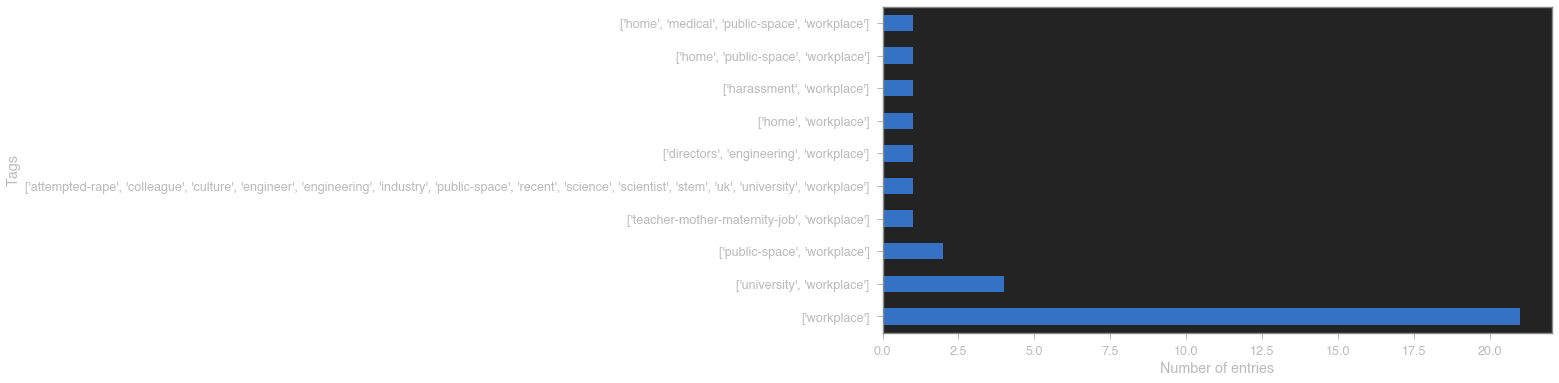

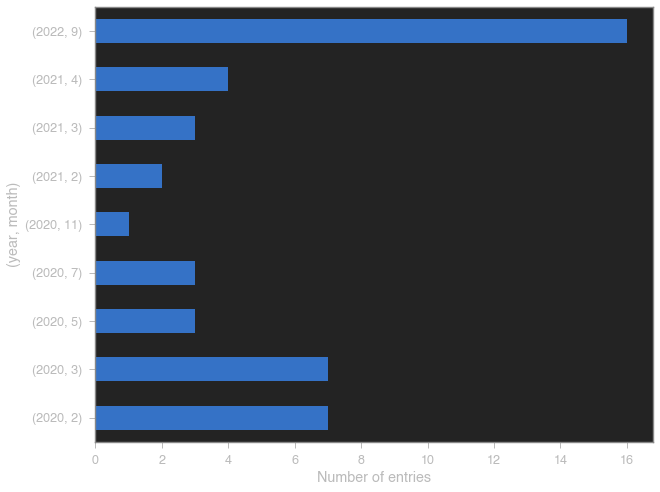

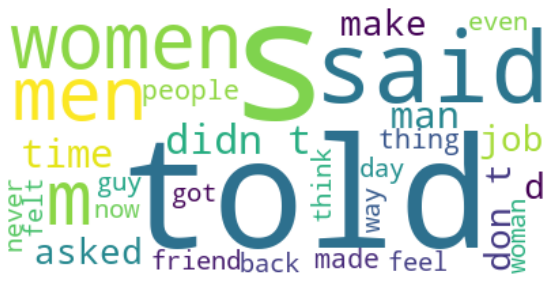

In [216]:
eda(filteredFrame)
highLevelWordCloud(filteredFrame)

### **The above wordcloud doesn't tell us much information as it doesn't show much of the context or topics. We shall do a more thorough clean up and further topic modelling to get better insight.**

# Topic modelling using LDA

Linear Dirichlet Allocation (DLA) in the context of natural language processing is a type of modelling that can be used to make observations of similar distribution of topics/words. The general assumption is that each entry (document) comprises a mixture of topics. And each topic is a mixture of words (tokens).

To perform LDA, we'll use the gensim package. First install using `pip install gensim` or `conda install -c conda-forge gensim`)

In [217]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import STOPWORDS  # we'll use a bigger library of STOPWORDS from gensim instead of nltk
import gensim.corpora as corpora
import nltk
import ast # used in lemmatize function

### Preprocessing for LDA

In [218]:
# define functions for preprocessing

# break into tokens and deaccent, will convert to lowercase, ignoring tokens that are too short or too long
def tokenizeAndDeaccent(sentences):
    '''
    Uses gensim simple_preprocess method to deaccent, convert to lower case text, and tokenize sentences.

    :param sentences    : list of str, where is each story entry is a list itself.
    :yield              : generator object
    '''
    for sentence in sentences:
        yield(simple_preprocess(str(sentence),deacc=True))

# remove stop words
def removeStopWords(text, stopWords):
    '''
    Remove stopwords in text.

    :param text         : list of list of str, where is each string element is an entry/story.
    :param stopWords    : list of str, list of stopwords
    :return             : list of list of str
    '''
    # return [[word for word in simple_preprocess(str(entry)) if word not in stopWords] for entry in text]
    return [[word for word in entry if word not in stopWords] for entry in text]

# stemming  
def stem(text):
    '''
    Lemmatize text using gensim's porterstemmer to  - reduce the text to its common base form. For example, car,cars -> car.

    :param text         : list of list of str, where is each story entry is a list itself.
    :return             : list of list of str
    '''
    porter = PorterStemmer()
    return ast.literal_eval(porter.stem(str(text)))

# give most common words
def findFreqDist(text, k):
    '''
    Obtain top k common words in text using nltk freqdist.

    :param text         : list of list of str, where is each story entry is a list itself.
    :param k            : number of k top words
    :return             : list of list of str
    '''
    fdist = nltk.FreqDist([item for sublist in text for item in sublist])
    topCommonWords = [i[0] for i in fdist.most_common(k)]
    return topCommonWords

def grabTextData(df):
    '''
    param frame         : dataFrame
    return              : lst, tokenList - list of token
    '''
    textData = df['description'].values.tolist()
    return textData


In [219]:
textData = grabTextData(filteredFrame)
tokenList = list(tokenizeAndDeaccent(textData))

### Manual inspection of words needed here to set k value

In [220]:
# obtain top k most frequent words from the text
k=150 

topCommonWords = findFreqDist([i.split(' ') for i in textData],k)

# inspect common words to see if it's reasonable to filter off
print(topCommonWords)

['I', 'and', 'to', 'the', 'a', 'my', 'was', 'of', 'in', 'that', 'me', 'for', 'he', 'at', 'with', 'on', 'have', 'it', 'as', 'is', 'not', 'had', 'this', 'be', 'but', '–', 'about', 'they', 'who', 'told', 'because', 'would', 'by', 'so', 'or', 'his', 'from', 'when', 'women', 'were', 'one', 'are', 'been', 'him', 'you', 'work', 'an', 'all', 'men', 'He', 'get', 'no', 'if', 'am', 'The', 'I’m', 'her', 'just', 'male', 'very', 'man', 'up', 'how', 'said', 'time', 'When', 'career', 'what', 'like', 'we', 'their', 'could', 'didn’t', 'got', 'other', 'out', 'I’ve', 'also', 'which', 'do', 'more', 'back', 'did', 'me.', 'after', 'them', 'should', 'being', 'It', 'people', 'she', 'make', 'colleague', 'any', 'job', 'where', 'only', 'me,', 'This', 'went', 'years', 'My', 'asked', 'feel', 'has', 'One', 'then', 'name', 'female', 'first', 'can', 'much', 'than', 'same', 'made', 'want', 'into', 'don’t', 'new', 'know', 'husband', 'now', 'really', 'sexual', 'thought', 'school', 'And', 'even', 'woman', 'down', 'good', 

Out of the k number of common words, we will not filter off some of them as the can have some context

In [221]:
retainList = ['career', 'colleague', 'job', 'name', 'new', 'know', 'husband', 'now', 'really', 'sexual', \
                'thought', 'school', 'down', 'good', 'manager', 'felt', 'there', 'without', 'will', 'say', 'your', \
                'harassment', 'over']
# retainList = ['job', 'asked', 'feel', 'husband']

topCommonWordsToFilter = [word for word in topCommonWords if word not in retainList]
print(topCommonWordsToFilter)

['I', 'and', 'to', 'the', 'a', 'my', 'was', 'of', 'in', 'that', 'me', 'for', 'he', 'at', 'with', 'on', 'have', 'it', 'as', 'is', 'not', 'had', 'this', 'be', 'but', '–', 'about', 'they', 'who', 'told', 'because', 'would', 'by', 'so', 'or', 'his', 'from', 'when', 'women', 'were', 'one', 'are', 'been', 'him', 'you', 'work', 'an', 'all', 'men', 'He', 'get', 'no', 'if', 'am', 'The', 'I’m', 'her', 'just', 'male', 'very', 'man', 'up', 'how', 'said', 'time', 'When', 'what', 'like', 'we', 'their', 'could', 'didn’t', 'got', 'other', 'out', 'I’ve', 'also', 'which', 'do', 'more', 'back', 'did', 'me.', 'after', 'them', 'should', 'being', 'It', 'people', 'she', 'make', 'any', 'where', 'only', 'me,', 'This', 'went', 'years', 'My', 'asked', 'feel', 'has', 'One', 'then', 'female', 'first', 'can', 'much', 'than', 'same', 'made', 'want', 'into', 'don’t', 'And', 'even', 'woman', 'couldn’t', 'some', 'while', 'take', 'two', 'these', 'What', 'having', 'off', 'few']


In [222]:
# use standard stopwords from gensim
stopWords = list(STOPWORDS)
len(stopWords)

# filter off more common words
stopWords.extend(topCommonWordsToFilter)
print(stopWords)

['beside', 'thus', 'de', 'same', 'even', 'please', 'except', 'cannot', 'here', 'upon', 'elsewhere', 'due', 'anything', 'whence', 'thick', 'his', 'would', 'been', 'third', 'side', 'seeming', 'call', 'fire', 'therefore', 'whereupon', 'bill', 'moreover', 'really', 'so', 'few', 'amoungst', 'perhaps', 'down', 'ourselves', 'eight', 'meanwhile', 'whither', 'their', 'between', 'thin', 'someone', 'however', 'didn', 'couldnt', 'interest', 'under', 'in', 'seemed', 'another', 'kg', 'hundred', 'top', 'each', 'of', 'has', 'anyone', 'herself', 'after', 'by', 'also', 'often', 'therein', 'one', 'becoming', 'amount', 'put', 'again', 'though', 'very', 'behind', 'hereupon', 'nothing', 'wherever', 'many', 'could', 'them', 'hence', 'only', 'various', 'those', 'up', 'where', 'rather', 'via', 'they', 'more', 'quite', 'toward', 'see', 'its', 'inc', 'eleven', 'first', 'seems', 'not', 'who', 'what', 'thereafter', 'system', 'fill', 'that', 'computer', 'otherwise', 'fifty', 'on', 'about', 'whereafter', 'together',

In [223]:
# remove stop words
tokenNoStopWords = removeStopWords(tokenList, stopWords)  
#print(tokenNoStopWords)

In [224]:
# perform stemming
tokenNoStopWordsStemed = stem(tokenNoStopWords)

# peform lemmatization
nltk.download('wordnet')
lemmaObj = nltk.wordnet.WordNetLemmatizer()

tokenNoStopWordsStemLem = [[lemmaObj.lemmatize(word) for word in entry] for entry in tokenNoStopWordsStemed]
# print(tokenNoStopWordsStemLem)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/franciscatan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [225]:
# check n top common words again, second pass
n = 50
print(findFreqDist(tokenNoStopWordsStemLem, n))


['career', 'colleague', 'job', 've', 'thing', 'comment', 'school', 'girl', 'know', 'husband', 'life', 'experience', 'good', 'new', 'company', 'promotion', 'friend', 'harassment', 'guy', 'thought', 'manager', 'day', 'sexual', 'word', 'way', 'felt', 'behaviour', 'bos', 'child', 'couldn', 'stop', 'person', 'left', 'leave', 'old', 'tired', 'young', 'wasn', 'saying', 'office', 'wanted', 'dad', 'home', 'university', 'street', 'wake', 'meeting', 'try', 'called', 'lot']


Upon inspection of the top common words again, we'll exlude some that make sense to. 

In [229]:
# commonWordsSecondPass = ['day', 'thing', 'guy', 'woman', 'girl', 've', 'way', \
#                         'boy', 'working', 'old', 'wanted', 'good', 'going', \
#                         'life', 'year', 'tell', 'came', 'come', 'worked', \
#                         'new', 'left', 'saying', 'wasn', \
#                         'week', 'let', 'need', 'time']

# commonWordsSecondPass = ['ve', 'couldn', 'worked', 'working', 'going']
commonWordsSecondPass = ['ve', 'thing', 'girl', 'guy']

In [230]:
# remove common words again
cleanTextPassed = str([item for item in tokenNoStopWordsStemLem if item not in commonWordsSecondPass])

In [231]:
# further filtering of common words
newtokens = []
for tok in tokenNoStopWordsStemLem:
   newtokens.append(list(filter(lambda x: x not in commonWordsSecondPass, tok)))

# double check that filtering worked
print(findFreqDist(newtokens,30))

['career', 'colleague', 'job', 'comment', 'school', 'know', 'husband', 'life', 'experience', 'good', 'new', 'company', 'promotion', 'friend', 'harassment', 'thought', 'manager', 'day', 'sexual', 'word', 'way', 'felt', 'behaviour', 'bos', 'child', 'couldn', 'stop', 'person', 'left', 'leave']


In [232]:
# build corpus

cleanTokenList = newtokens

wordID = corpora.Dictionary(cleanTokenList)
#list(corpusDict)

corpus = [wordID.doc2bow(tokenList) for tokenList in cleanTokenList]


In [233]:
len(corpus)

46

### LDA modelling

One caveat about LDA modelling is that it requires the user to decide on the number of topics. We'll use some simple metrics like perplexity and coherence to decide what the ideal number of topics would be.

The perplexity gives a measure tells how well the model predicts (predictive likelihood). Gensim libraries can calculate perplexity, it would be in negative sign because it's a log of the number. So for example, -1 is better than -2. However, some studies shows that perplexity is not offen correlated with human judgement of topics. See https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 

The coherence score measures how interpretable the topic would be - it measures how similar the words in the topics are to each other.
Some information on types of coherence scores: https://www.baeldung.com/cs/topic-modeling-coherence-score

In [234]:
perplexityList = []
coherenceList = []
maxNumTopics = 40

for numTopics in range(1,maxNumTopics+1):
    print('numTopics = ' + str(numTopics))

    #build LDA model
    lda = gensim.models.LdaModel(corpus=corpus, id2word=wordID,num_topics=numTopics, \
                passes=4, alpha=[0.01]*numTopics, eta=[0.01]*len(wordID.keys()))  #, \
            #  iterations=50, chunksize=100, eval_every=None, random_state=0)

    # # print keywords per topic
    # for i,topic in lda.show_topics(formatted=True, num_topics=numTopics, num_words=10):
    #     print(str(i)+": "+ topic)

    # calculate perplexity and coherence score
    perplexityScore = lda.log_perplexity(corpus)
    # {u_mass', 'c_v', 'c_uci', 'c_npmi'}
    coherenceScoreLda = gensim.models.CoherenceModel(model=lda, texts=cleanTokenList, dictionary=wordID, coherence='c_v')  #conda install -c conda-forge python-levenshtein
    coherenceScore = coherenceScoreLda.get_coherence()
    
    # print('Perplexity:', perplexityScore)
    # print('Coherence Score:', coherenceScore)

    perplexityList.append(perplexityScore)
    coherenceList.append(coherenceScore)

numTopics = 1
numTopics = 2
numTopics = 3
numTopics = 4
numTopics = 5
numTopics = 6
numTopics = 7
numTopics = 8
numTopics = 9
numTopics = 10
numTopics = 11
numTopics = 12
numTopics = 13
numTopics = 14
numTopics = 15
numTopics = 16
numTopics = 17
numTopics = 18
numTopics = 19
numTopics = 20
numTopics = 21
numTopics = 22
numTopics = 23
numTopics = 24
numTopics = 25
numTopics = 26
numTopics = 27
numTopics = 28
numTopics = 29
numTopics = 30
numTopics = 31
numTopics = 32
numTopics = 33
numTopics = 34
numTopics = 35
numTopics = 36
numTopics = 37
numTopics = 38
numTopics = 39
numTopics = 40


In [235]:
len(perplexityList)

40

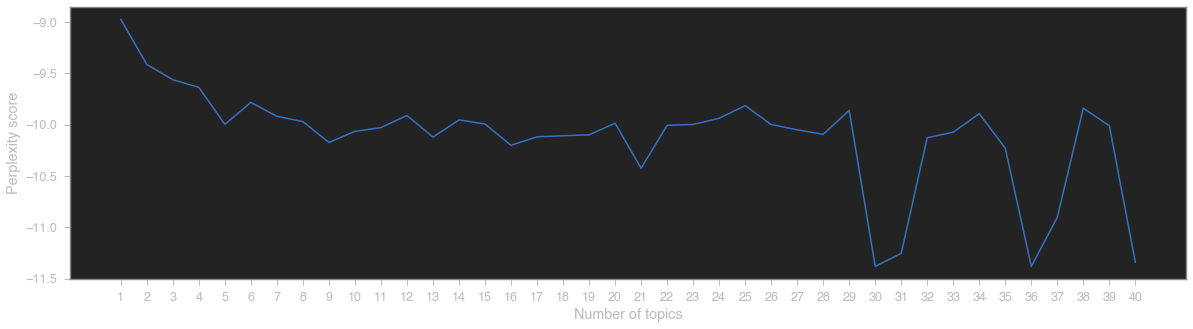

In [236]:
plt.figure(figsize=(20,5))
ax = plt.plot(perplexityList)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')
plt.xticks(ticks=range(0,maxNumTopics),labels=range(1,maxNumTopics+1))
plt.show() # to supress output text

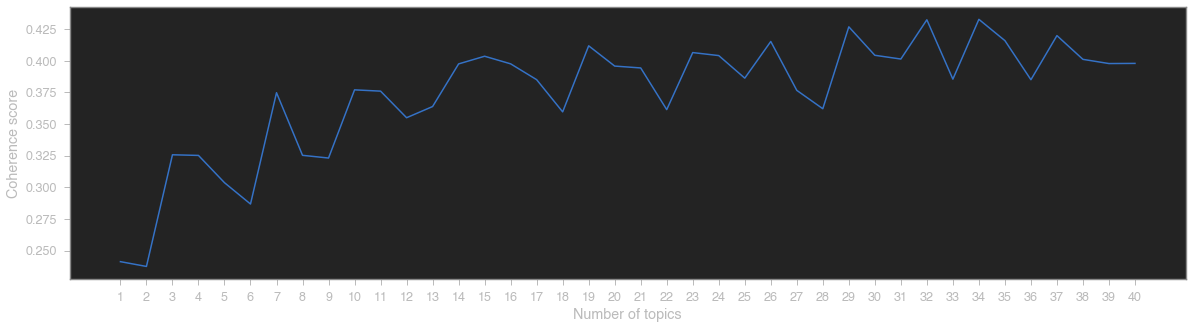

In [237]:
plt.figure(figsize=(20,5))
ax = plt.plot(coherenceList)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.xticks(ticks=range(0,maxNumTopics),labels=range(1,maxNumTopics+1))
plt.show() # to supress output text

Choose an n number of the appropriate number of topics based on the graphs above, and rebuild the model based on that number

In [238]:
# set numTopics to be the ideal number
# numTopics = 11 # pay|salary
numTopics = 20 # career|promotion

lda = gensim.models.LdaModel(corpus=corpus, id2word=wordID,num_topics=numTopics, \
                passes=4, alpha=[0.01]*numTopics, eta=[0.01]*len(wordID.keys()))  #, \
            #  iterations=50, chunksize=100, eval_every=None, random_state=0)

perplexityScore = lda.log_perplexity(corpus)
# {u_mass', 'c_v', 'c_uci', 'c_npmi'}
coherenceScoreLda = gensim.models.CoherenceModel(model=lda, texts=cleanTokenList, dictionary=wordID, coherence='c_v') 
coherenceScore = coherenceScoreLda.get_coherence()
    
print('Perplexity:', perplexityScore)
print('Coherence Score:', coherenceScore)

Perplexity: -10.254484260607612
Coherence Score: 0.43467691033820444


To visualise LDA, we'll use pyldavis. First install using `pip install pyldavis` or `conda install -c conda-forge pyldavis`)

In [239]:
# visualize LDA
import pyLDAvis
import pyLDAvis.gensim_models as ldavis
from jupyterthemes import jtplot  #conda install -c conda-forge jupyterthemes

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [240]:
vis = ldavis.prepare(topic_model=lda, corpus=corpus, dictionary=wordID, sort_topics=False) #sort_topics=True would sort topics by proportion
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)


/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/francis

### Assign topic number back to document

In [241]:
def createTopicFrame(lda,corpus,df):
    '''
    Purpose: Grab topic number and probabiliy from the lda model and put them in a dataframe.

    param lda       : LDA model
    param corpus    : corpus of text
    param df        : dataframe analysed

    '''

    topics = [lda[corpus[entry]][0] for entry in range(len(df))]
    topicFrame = pd.DataFrame(topics, columns=['Topic Number', 'LDA Probability Score'])
    topicFrame['Topic Number'] = topicFrame['Topic Number'].apply(lambda x: x+1)
    return topicFrame

In [242]:
topicFrame = createTopicFrame(lda,corpus,filteredFrame)
topicFrame.head()

,Topic Number,LDA Probability Score
0,8,0.990104
1,6,0.993262
2,12,0.680235
3,16,0.997770
4,4,0.998595


In [243]:
len(topicFrame)

46

In [244]:
topicFrame['LDA Probability Score'].describe()

count    46.000000
mean     0.892583 
std      0.253563 
min      0.012252 
25%      0.985845 
50%      0.994995 
75%      0.997273 
max      0.999289 
Name: LDA Probability Score, dtype: float64

From the above description, the mean probability is pretty good.
Let's plot the distribution of topics based on the entries in the dataset.

Text(0, 0.5, 'Number of documents')

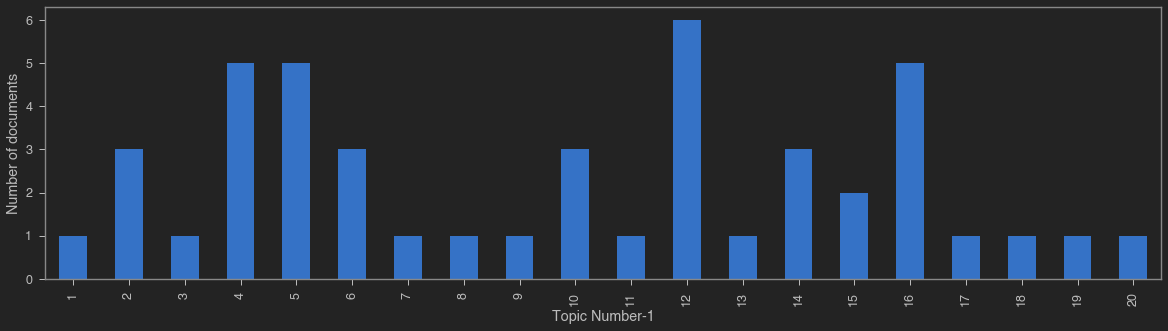

In [245]:
plt.figure()
topicFrame['Topic Number'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.xlabel('Topic Number-1')
plt.ylabel('Number of documents')

In [246]:
# grab word features for each topic number and put them in a dataframe

topicFeatureFrame = pd.DataFrame(lda.show_topics(num_topics=numTopics, num_words=10), columns=['Topic Number','Feature Words'])
topicFeatureFrame['Topic Number'] = topicFeatureFrame['Topic Number'].apply(lambda x: x+1)
topicFeatureFrame.tail()

,Topic Number,Feature Words
15,16,"0.023*""husband"" + 0.022*""career"" + 0.018*""volunteer"" + 0.014*""lot"" + 0.014*""breast"" + 0.011*""older"" + 0.009*""staff"" + 0.009*""speak"" + 0.009*""spent"" + 0.009*""polite"""
16,17,"0.012*""pregnant"" + 0.011*""client"" + 0.011*""meeting"" + 0.009*""deadline"" + 0.009*""technical"" + 0.009*""executive"" + 0.008*""career"" + 0.008*""promotion"" + 0.007*""hr"" + 0.007*""job"""
17,18,"0.027*""left"" + 0.026*""management"" + 0.026*""advice"" + 0.015*""skill"" + 0.015*""leadership"" + 0.015*""received"" + 0.015*""career"" + 0.014*""help"" + 0.014*""following"" + 0.014*""person"""
18,19,"0.032*""colleague"" + 0.017*""pick"" + 0.017*""company"" + 0.017*""day"" + 0.017*""promotion"" + 0.017*""laid"" + 0.016*""praised"" + 0.016*""producing"" + 0.016*""phone"" + 0.016*""generally"""
19,20,"0.014*""leave"" + 0.011*""behaviour"" + 0.011*""school"" + 0.011*""felt"" + 0.010*""comment"" + 0.009*""old"" + 0.009*""house"" + 0.008*""promotion"" + 0.008*""learned"" + 0.007*""turned"""


In [247]:
print(str(topicFeatureFrame[topicFeatureFrame['Topic Number'] == 7]['Feature Words']))

6    0.024*"wage" + 0.023*"english" + 0.017*"large" + 0.016*"recruiter" + 0.016*"article" + 0.014*"open" + 0.012*"good" + 0.012*"issue" + 0.011*"pretty" + 0.011*"country"
Name: Feature Words, dtype: object


### What are the top 5 most 'coherent' topics?

In [248]:
# Grab all top topics from LDA model
# lda.top_topics(corpus, topn=10)[0][0]
topTopics = lda.top_topics(corpus, topn=10)
len(topTopics)

20

In [249]:
# Remap tuples to dict so that wordcloud function accepts it, do for top n topics
n = 5
topTopics = [{wordFeature:freq for freq, wordFeature in lda.top_topics(corpus, topn=10)[topic][0]} for topic in range(n)]
topTopics[0]

{'wage': 0.024093425,
 'english': 0.022516923,
 'large': 0.01718854,
 'recruiter': 0.016210597,
 'article': 0.015753828,
 'open': 0.013564245,
 'good': 0.012229339,
 'issue': 0.011608899,
 'pretty': 0.011115654,
 'country': 0.011087874}

/var/folders/gh/cyykbpd16fj4_f_f7h8m48f00000gn/T/ipykernel_97598/3879741040.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((len(topTopics)/2+1), 2, i+1)


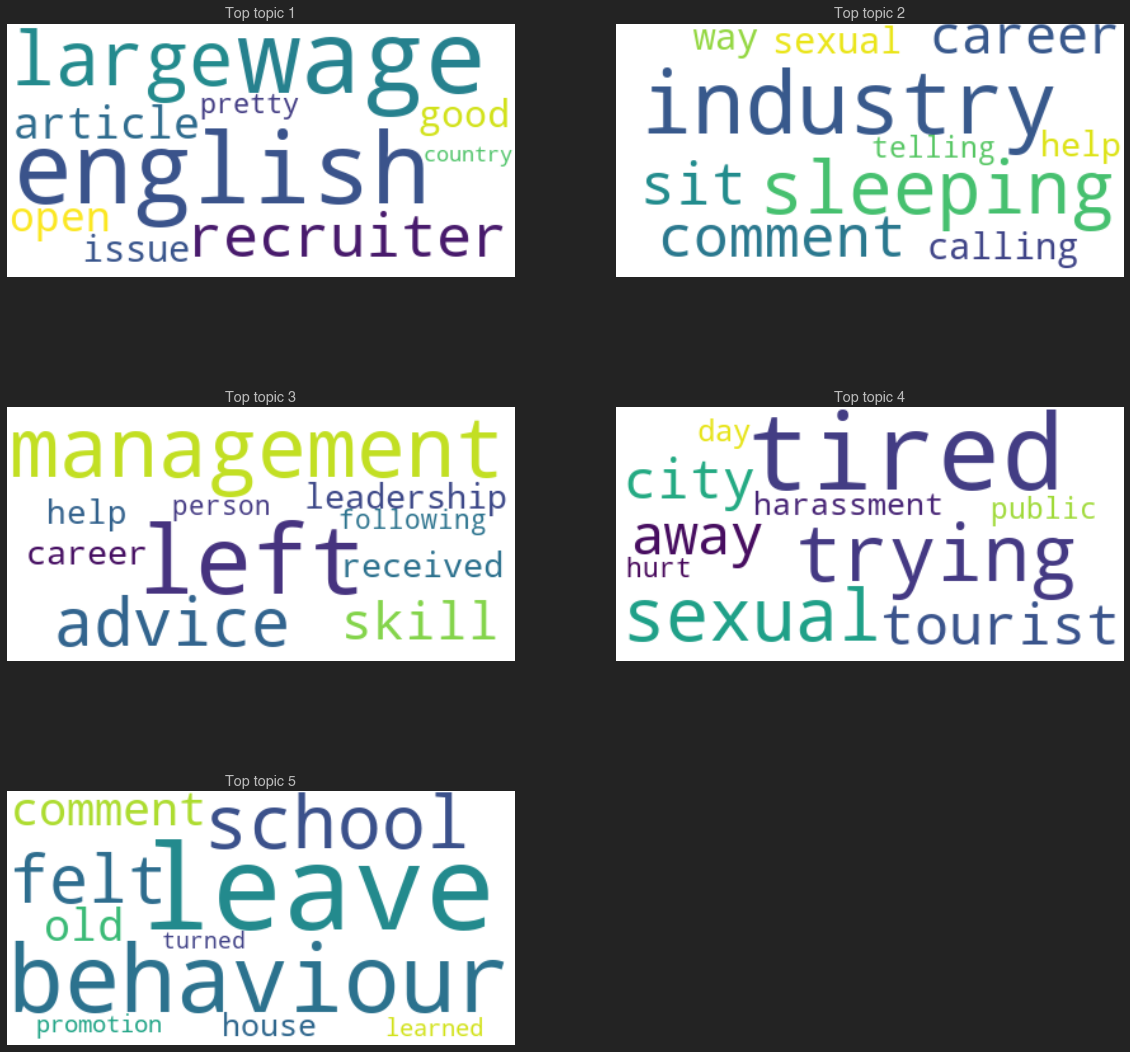

In [250]:
# wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1)
plt.figure(figsize=(20,20))
wordcloud = WordCloud(prefer_horizontal=1, background_color='white')

for i in range(len(topTopics)):
    wordcloud.generate_from_frequencies(frequencies=topTopics[i])
    plt.subplot((len(topTopics)/2+1), 2, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Top topic ' + str(i+1))

plt.show()

There are other ways that can be further explored to fine tune the LDA model - for example:
- further cleaning or filtering by choosing noun and/or verbs and/or adjectives
- changing the LDA learning parameters
- keeping phrases (bigram/trigram)

### Helpful references:
- https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
- https://www.kdnuggets.com/2019/09/overview-topics-extraction-python-latent-dirichlet-allocation.html
- https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

